# Download the dataset and visualize it

In [ ]:
!wget -r -N -c -np https://physionet.org/files/adfecgdb/1.0.0/

In [42]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = "physionet.org/files/adfecgdb/1.0.0/r04.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from /home/amirsalimi/ECG_Nexting/physionet.org/files/adfecgdb/1.0.0/r04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<AxesSubplot:>

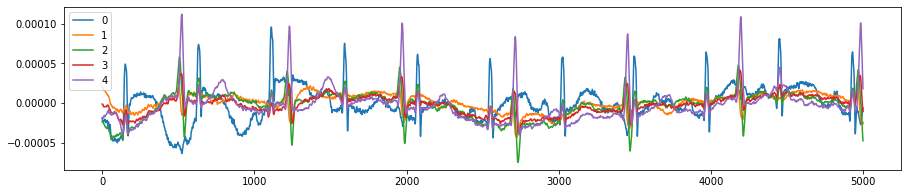

In [43]:
df = pd.DataFrame(raw_data.T).iloc[0:5000]
df.plot(kind="line",figsize=(15,3))

# cleaned data

In [22]:
import neurokit2 as nk

In [54]:
for i in range(len(raw_data)):
    raw_data[i] = nk.ecg_clean(raw_data[i],method="neurokit")
with open("data/cleaned_ecg.npy","wb") as f:
    np.save(f,raw_data)

<AxesSubplot:>

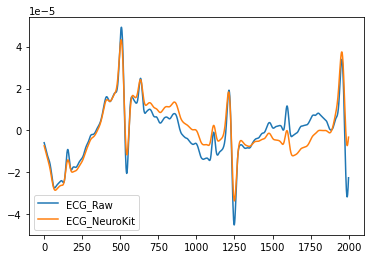

In [56]:
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

ecg = raw_data[2,0:2000]
signals = pd.DataFrame({"ECG_Raw" : ecg,
                      "ECG_NeuroKit" : nk.ecg_clean(ecg, sampling_rate=1000, method="neurokit"),
#                       "ECG_BioSPPy" : nk.ecg_clean(ecg, sampling_rate=1000, method="biosppy"),
#                       "ECG_PanTompkins" : nk.ecg_clean(ecg, sampling_rate=1000, method="pantompkins1985"),
#                       "ECG_Hamilton" : nk.ecg_clean(ecg, sampling_rate=1000, method="hamilton2002"),
#                       "ECG_Elgendi" : nk.ecg_clean(ecg, sampling_rate=1000, method="elgendi2010"),
#                       "ECG_EngZeeMod" : nk.ecg_clean(ecg, sampling_rate=1000, method="engzeemod2012")
                       })
# @savefig p_ecg_clean.png scale=100%
signals.plot()

<AxesSubplot:>

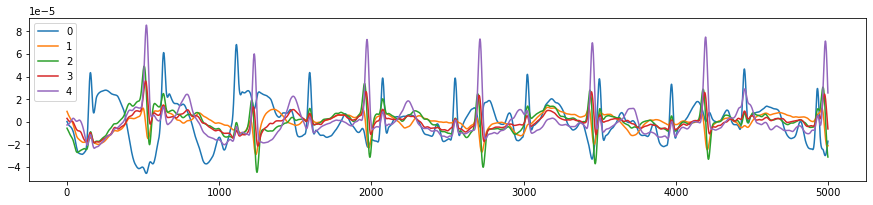

In [57]:
df = pd.DataFrame(raw_data.T).iloc[0:5000]
df.plot(kind="line",figsize=(15,3))